### Step 1: Selecting 5 UMD professors' reviews and stars off of Planet Terp API

In [1]:
# IF YOU'RE MISSING ANY LIBRARIES IN YOUR VENV, YOU MIGHT NEED TO %PIP INSTALL THEM FIRST!!!!!

In [2]:
# Using planetterp API & Python wrapper for data

import planetterp
professor1 = planetterp.professor(name="Justin Wyss-Gallifent", reviews="true")
professor2 = planetterp.professor(name="Kevin Daniels", reviews="true")
professor3 = planetterp.professor(name="Christopher Kauffman", reviews="true")
professor4 = planetterp.professor(name="Nelson Padua-Perez", reviews="true")
professor5 = planetterp.professor(name="David Mount", reviews="true")

In [3]:
# Getting all the reviews and ratings possible for my selected professors

reviews_and_ratings_1 = []
for i in range(len(professor1['reviews'])):
    if professor1['reviews'][i]['review'][-1] != "." and professor1['reviews'][i]['review'][-1] != "!" and professor1['reviews'][i]['review'][-1] != "?" and professor1['reviews'][i]['review'][-2] != "." and professor1['reviews'][i]['review'][-2] != "!" and professor1['reviews'][i]['review'][-2] != "?":
        reviews_and_ratings_1.append(f"{professor1['reviews'][i]['review']}. Rating (1-5 stars): {professor1['reviews'][i]['rating']}")
    else:
        reviews_and_ratings_1.append(f"{professor1['reviews'][i]['review']} Rating (1-5 stars): {professor1['reviews'][i]['rating']}")
reviews_and_ratings_2 = []
for i in range(len(professor2['reviews'])):
    if professor2['reviews'][i]['review'][-1] != "." and professor2['reviews'][i]['review'][-1] != "!" and professor2['reviews'][i]['review'][-1] != "?" and professor2['reviews'][i]['review'][-2] != "." and professor2['reviews'][i]['review'][-2] != "!" and professor2['reviews'][i]['review'][-2] != "?":
        reviews_and_ratings_2.append(f"{professor2['reviews'][i]['review']}. Rating (1-5): {professor2['reviews'][i]['rating']}")
    else:
        reviews_and_ratings_2.append(f"{professor2['reviews'][i]['review']} Rating (1-5): {professor2['reviews'][i]['rating']}")
reviews_and_ratings_3 = []
for i in range(len(professor3['reviews'])):
    if professor3['reviews'][i]['review'][-1] != "." and professor3['reviews'][i]['review'][-1] != "!" and professor3['reviews'][i]['review'][-1] != "?" and professor3['reviews'][i]['review'][-2] != "." and professor3['reviews'][i]['review'][-2] != "!" and professor3['reviews'][i]['review'][-2] != "?":
        reviews_and_ratings_3.append(f"{professor3['reviews'][i]['review']}. Rating (1-5): {professor3['reviews'][i]['rating']}")
    else:
        reviews_and_ratings_3.append(f"{professor3['reviews'][i]['review']} Rating (1-5): {professor3['reviews'][i]['rating']}")
reviews_and_ratings_4 = []
for i in range(len(professor4['reviews'])):
    if professor4['reviews'][i]['review'][-1] != "." and professor4['reviews'][i]['review'][-1] != "!" and professor4['reviews'][i]['review'][-1] != "?" and professor4['reviews'][i]['review'][-1] != "." and professor4['reviews'][i]['review'][-2] != "!" and professor4['reviews'][i]['review'][-2] != "?":
        reviews_and_ratings_4.append(f"{professor4['reviews'][i]['review']}. Rating (1-5 stars): {professor4['reviews'][i]['rating']}")
    else:
        reviews_and_ratings_4.append(f"{professor4['reviews'][i]['review']} Rating (1-5): {professor4['reviews'][i]['rating']}")
reviews_and_ratings_5 = []
for i in range(len(professor5['reviews'])):
    if professor5['reviews'][i]['review'][-1] != "." and professor5['reviews'][i]['review'][-1] != "!" and professor5['reviews'][i]['review'][-1] != "?" and professor5['reviews'][i]['review'][-2] != "." and professor5['reviews'][i]['review'][-2] != "!" and professor5['reviews'][i]['review'][-2] != "?":
        reviews_and_ratings_5.append(f"{professor5['reviews'][i]['review']}. Rating (1-5): {professor5['reviews'][i]['rating']}")
    else:
        reviews_and_ratings_5.append(f"{professor5['reviews'][i]['review']} Rating (1-5): {professor5['reviews'][i]['rating']}")
allreviews = reviews_and_ratings_1 + reviews_and_ratings_2 + reviews_and_ratings_3 + reviews_and_ratings_4 + reviews_and_ratings_5
print(f"Total number of all reviews across my 5 selected professors: {len(allreviews)}")
print(f"Getting the head of the data: \n\n")
for i in range(5):
    print(allreviews[i] + "\n\n")


Total number of all reviews across my 5 selected professors: 706
Getting the head of the data: 


Best Math professor I've ever had at UMD, hands down. If this guy is available for any Math course that you are taking, ENROLL FOR JUSTIN'S CLASS. You will definitely not regret it. He teaches in such a clear and precise manner, and he is also a very nice guy that is willing to help you after class. He genuinely loves to teach to students, and it really shows.  Rating (1-5 stars): 5


He is a great teacher I highly recommend him, but you can obviously tell that by his rating.  Rating (1-5 stars): 5


Justin is one of the best, if not the best professor I have had at UMD. He always comes in prepared, and since he has been teaching this class for years, he knows and stresses all the places where people tend to make mistakes, so you won't make them. He has a step-by-step approach to solving every problem you will run into. In addition, he is also very kind and makes jokes throughout the lectu

### Step 2: Using Pytorch to fine tune a model on the ingested reviews (not stars since we DON'T SET THIS UP AS A SUPERVISED LEARNING PROBLEM) 

In [4]:
# You may have to uncomment this block, run it, and then reload kernel, and then run everything again!!!

# %pip install 'accelerate>=0.26.0'
# %pip install 'transformers[torch]'

In [5]:
# Fine-tuning the model

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments, DataCollatorForLanguageModeling
import pandas as pd
from datasets import Dataset

df = pd.DataFrame(allreviews, columns=['reviews'])

model_name = "distilgpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Without this line produces ValueError: Asking to pad but the tokenizer does not have a padding token. Please select a token to use as `pad_token` `(tokenizer.pad_token = tokenizer.eos_token e.g.)` or add a new pad token via `tokenizer.add_special_tokens({'pad_token': '[PAD]'})`.
tokenizer.pad_token = tokenizer.eos_token

# Tokenizing dataset
dataset = Dataset.from_dict({"text": df['reviews'].tolist()})
def tokenize(data):
    return tokenizer(data["text"], truncation= True, max_length=256, padding="max_length")
tokenized_dataset = dataset.map(tokenize, batched=True, remove_columns=["text"]) # Remove the text column after generation

# Training dataset
trainer = Trainer(
    model = model, # Use our model
    args = TrainingArguments(output_dir="./finetuned_model", num_train_epochs=2, per_device_train_batch_size=4, save_steps=500, save_total_limit=1, logging_steps=50, report_to="none"), # Save to a dir finedtuned_model so that we don't have to load everytime in the notebook
    train_dataset = tokenized_dataset, # Use our tokenized dataset
    data_collator = DataCollatorForLanguageModeling(tokenizer = tokenizer, mlm = False)  # Use our tokenized dataset
)
trainer.train()

/Users/ChrisWu/RFTPWSLTransfers/cmsc320/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Map: 100%|██████████| 706/706 [00:00<00:00, 10886.85 examples/s]
/Users/ChrisWu/RFTPWSLTransfers/cmsc320/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
50,3.893000
100,3.542100
150,3.426800
200,3.311300
250,3.242700
300,3.178800
350,3.147900


TrainOutput(global_step=354, training_loss=3.3887308411679027, metrics={'train_runtime': 144.0192, 'train_samples_per_second': 9.804, 'train_steps_per_second': 2.458, 'total_flos': 92237752958976.0, 'train_loss': 3.3887308411679027, 'epoch': 2.0})

In [6]:
# Testing the generative output of the fine-tuned model

from transformers import StoppingCriteria, StoppingCriteriaList

stopping_criteria = StoppingCriteriaList([lambda input_ids, scores: '.' in tokenizer.decode(input_ids[0][-1]) or '!' in tokenizer.decode(input_ids[0][-1]) or '?' in tokenizer.decode(input_ids[0][-1])])
device = torch.device("cpu")
model = model.to(device)
test = "The professor was acting so badly. Rating: "
input = tokenizer(test, return_tensors="pt").to(device)
output = model.generate(input["input_ids"], attention_mask=input["attention_mask"], max_length = 50, num_return_sequences = 1, do_sample = True, temperature = 0.8, pad_token_id=tokenizer.eos_token_id, stopping_criteria=stopping_criteria)
text_generated = tokenizer.decode(output[0], skip_special_tokens=True)
print(f"Input: {test}")
print(f"Output: {text_generated}")

Input: The professor was acting so badly. Rating: 
Output: The professor was acting so badly. Rating:  Rating (1-5 stars): 5-5 stars (5 stars): 5-5 stars (5 stars): 5-5 stars (5 stars): 5-5 stars (5 stars): 5


### Step 2 Revisited: Using Pytorch to fine-tune a model (Supervised Learning since Unsupervised Learning produced bad results :()

In [7]:
from transformers import AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Splitting data for training
df = pd.DataFrame({
    'review': [item[:-1] for item in allreviews],
    'ratings': [item[-1] for item in allreviews]
})
df['labels'] = df['ratings'].astype(int) - 1
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['labels'])

# Loading model
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=5  # 5 classes: 1-5 stars
)

# Getting data ready
def tokenize_function(examples):
    return tokenizer(
        examples["review"],
        truncation=True,
        max_length=512,
        padding="max_length"
    )
train_dataset = Dataset.from_pandas(train_df[['review', 'labels']])
test_dataset = Dataset.from_pandas(test_df[['review', 'labels']])
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Training
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(labels, predictions)
    return {"accuracy": accuracy}
trainer = Trainer(
    model=model,
    args = TrainingArguments(
    output_dir="./finetuned_model_2",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to="none"),
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)
trainer.train()

# Testing accuracy
results = trainer.evaluate()
print(f"Test Accuracy: {results['eval_accuracy']:.4f}")

# Save model
model.save_pretrained("./finetuned_model_2/best_model")
tokenizer.save_pretrained("./finetuned_model_2/best_model")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Map: 100%|██████████| 142/142 [00:00<00:00, 8976.64 examples/s]
/Users/ChrisWu/RFTPWSLTransfers/cmsc320/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy
1,0.754200,0.864052,0.760563
2,0.646600,0.677753,0.753521
3,0.603700,0.667381,0.767606


/Users/ChrisWu/RFTPWSLTransfers/cmsc320/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/ChrisWu/RFTPWSLTransfers/cmsc320/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/ChrisWu/RFTPWSLTransfers/cmsc320/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Test Accuracy: 0.7676


('./finetuned_model_2/best_model/tokenizer_config.json',
 './finetuned_model_2/best_model/special_tokens_map.json',
 './finetuned_model_2/best_model/vocab.txt',
 './finetuned_model_2/best_model/added_tokens.json',
 './finetuned_model_2/best_model/tokenizer.json')

### Step 3: Using the fine-tuned supervised learning transformer model to guess how many stars correspond to that review

In [8]:
# Loading the models

model_path = "./finetuned_model_2/best_model"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

In [9]:
# Getting the predictions for all reviews and printing the head

predictions = []
for i, review_string in enumerate(allreviews):
    text_input = review_string[:-1] 
    
    inputs = tokenizer(
        text_input, 
        return_tensors="pt", 
        truncation=True, 
        max_length=512, 
        padding=True
    ).to(device)
    
    with torch.no_grad():
        outputs = model(**inputs)
        predicted_label = torch.argmax(outputs.logits, dim=1).item()
        
    predicted_stars = predicted_label + 1
    predictions.append(predicted_stars)

for i in range(5):
    input_display = allreviews[i][:-1] 
    print(f"Input end: ...{input_display[-50:]}") 
    print(f"Predicted Rating: {predictions[i]}")

Input end: ...udents, and it really shows.  Rating (1-5 stars): 
Predicted Rating: 5
Input end: ...sly tell that by his rating.  Rating (1-5 stars): 
Predicted Rating: 5
Input end: ... promise you won't regret it. Rating (1-5 stars): 
Predicted Rating: 5
Input end: ...nd it.  Make this a priority. Rating (1-5 stars): 
Predicted Rating: 5
Input end: ...awesome of a professor he is. Rating (1-5 stars): 
Predicted Rating: 5


### Step 4: Comparing the predicted ratings from the reviews by the fine-tuned transformer to the actual number of stars the reviews gave the professor.

In [10]:
from sklearn.metrics import classification_report

actual_ratings = [int(r[-1]) for r in allreviews]

df_results = pd.DataFrame({
    'Actual': actual_ratings,
    'Predicted': predictions
})

acc = accuracy_score(df_results['Actual'], df_results['Predicted'])
print(f"Accuracy: {acc:.2%}")
print("\nClassification Report:")
print(classification_report(df_results['Actual'], df_results['Predicted'], zero_division=0))

Accuracy: 80.59%

Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.72      0.60        32
           2       0.00      0.00      0.00        29
           3       0.75      0.09      0.16        34
           4       0.31      0.18      0.23        76
           5       0.86      0.99      0.92       535

    accuracy                           0.81       706
   macro avg       0.49      0.40      0.38       706
weighted avg       0.75      0.81      0.76       706



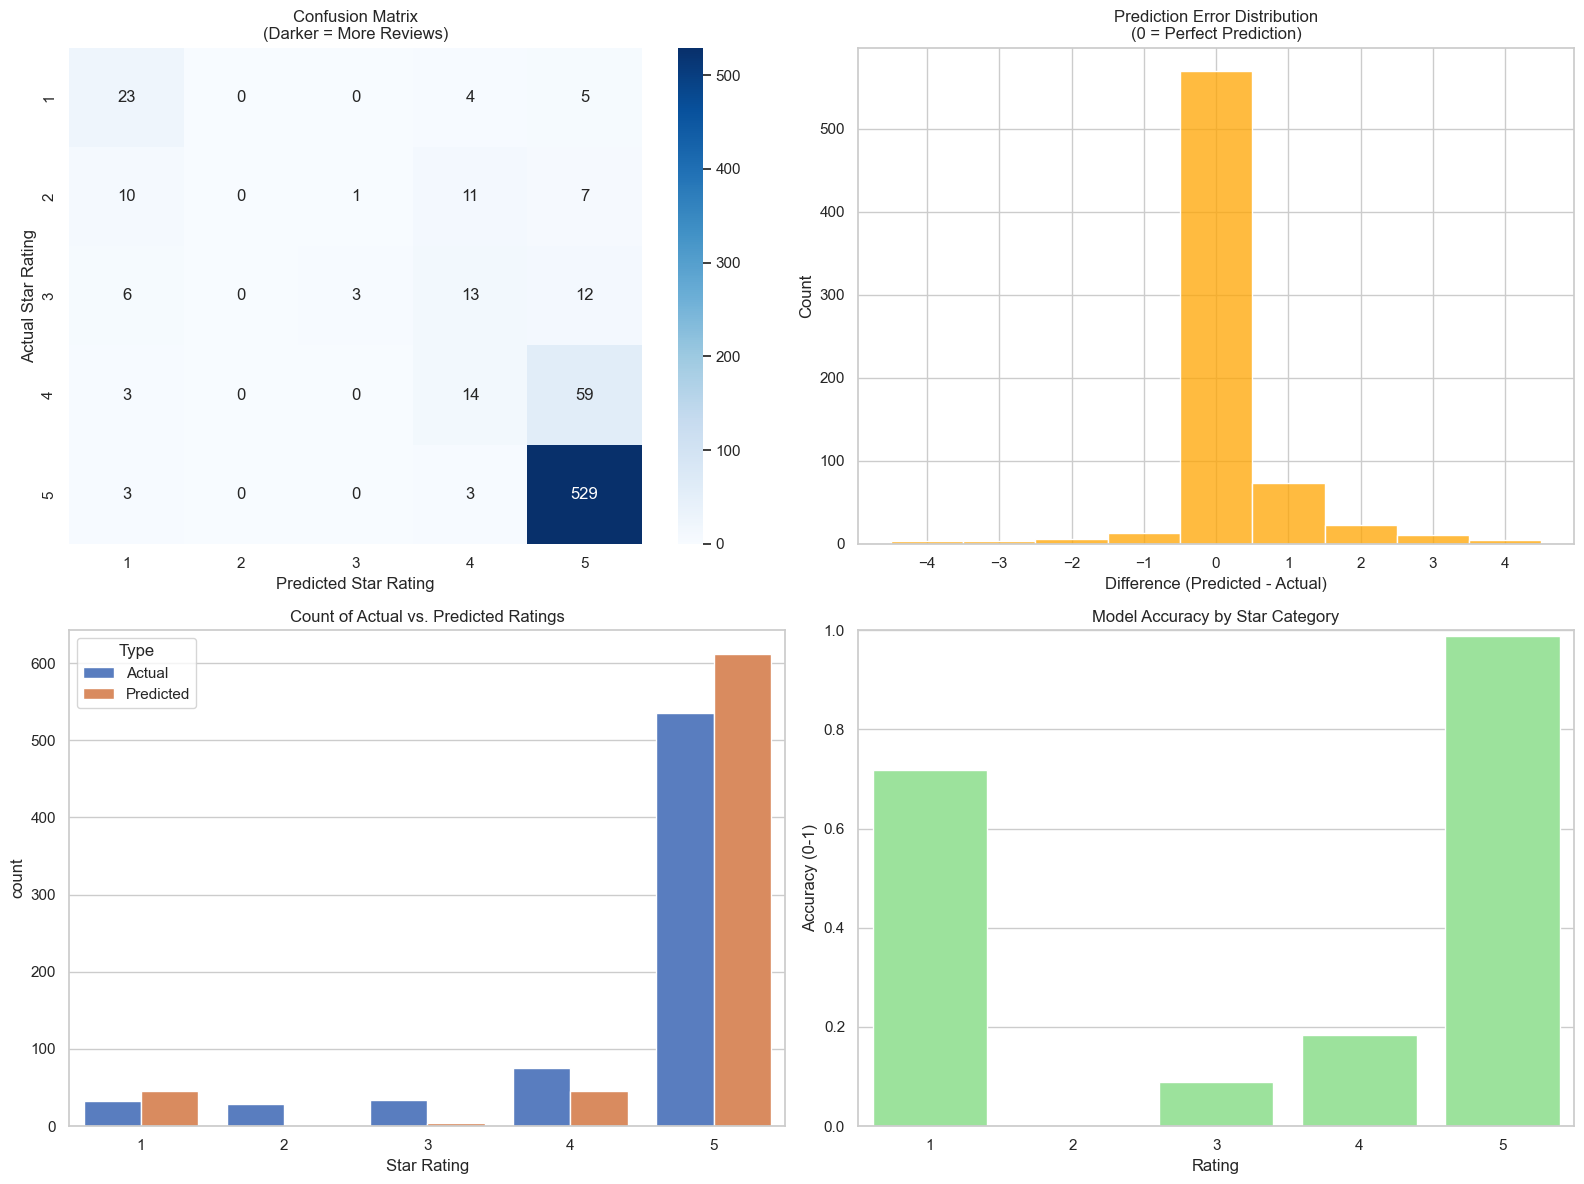

In [11]:
#GPT-ing visualizations

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set up the plotting style
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Confusion Matrix Heatmap
# This shows you WHERE the model is making mistakes (e.g., predicting 5 when it's really 1)
cm = confusion_matrix(df_results['Actual'], df_results['Predicted'], labels=[1,2,3,4,5])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
            xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
axes[0,0].set_title('Confusion Matrix\n(Darker = More Reviews)')
axes[0,0].set_xlabel('Predicted Star Rating')
axes[0,0].set_ylabel('Actual Star Rating')

# Plot 2: Distribution of Errors
# Ideally, this should be a tall bar at 0. Bars to the right mean the model over-predicted.
df_results['Error'] = df_results['Predicted'] - df_results['Actual']
sns.histplot(data=df_results, x='Error', discrete=True, color='orange', ax=axes[0,1])
axes[0,1].set_title('Prediction Error Distribution\n(0 = Perfect Prediction)')
axes[0,1].set_xlabel('Difference (Predicted - Actual)')
axes[0,1].set_xticks(range(-4, 5))

# Plot 3: Actual vs Predicted Counts
# Did the model predict "5 stars" way more often than it actually happened?
# We melt the dataframe to plot them side-by-side
df_melted = df_results[['Actual', 'Predicted']].melt(var_name='Type', value_name='Rating')
sns.countplot(data=df_melted, x='Rating', hue='Type', ax=axes[1,0], palette="muted")
axes[1,0].set_title('Count of Actual vs. Predicted Ratings')
axes[1,0].set_xlabel('Star Rating')

# Plot 4: Accuracy Per Star Rating
# This reveals if your model is biased (e.g., good at 5s, terrible at 3s)
accuracies = []
for rating in range(1, 6):
    subset = df_results[df_results['Actual'] == rating]
    if len(subset) > 0:
        acc_subset = accuracy_score(subset['Actual'], subset['Predicted'])
        accuracies.append({'Rating': rating, 'Accuracy': acc_subset})
    else:
        accuracies.append({'Rating': rating, 'Accuracy': 0})

df_acc = pd.DataFrame(accuracies)
sns.barplot(data=df_acc, x='Rating', y='Accuracy', ax=axes[1,1], color='lightgreen')
axes[1,1].set_title('Model Accuracy by Star Category')
axes[1,1].set_ylim(0, 1.0)
axes[1,1].set_ylabel('Accuracy (0-1)')

plt.tight_layout()
plt.show()